In [1]:
intro_images_path='./Images/Intro_images/'
edge_images_path='./Images/Edge_images/'
seg_images_path='../'#../Images/Seg_images/'
feature_images_path='../'#../Images/Feature_images/'
output_path='./Images/Outputs/'
print('Image paths ....')

Image paths ....


# COMPUTER VISION I

**Master in Artificial Intelligence, USC, UDC, UVigo**

Academic year 2022/23


<img src="./Logotipo_Solo.png" width=200/>

## 1 Edge Detection

- Image gradients
- Noise effect and smoothing
- Derivative of Gaussian filter
- Canny edge detector
- Lapacian
- Hough transform

http://szeliski.org/Book/


### Exercise Image gradients

OpenCV provides three types of derivate (high-pass) filters: Sobel, Scharr and Laplacian.
Repeat the first exercises on this page:
https://docs.opencv.org/4.3.0/d5/d0f/tutorial_py_gradients.html
https://docs.opencv.org/3.4.2/d5/d0f/tutorial_py_gradients.html



#### First deriative filters: Sobel and Scharr

The Sobel operators combine Gaussian smoothing and differentiation, so the result is more or less resistant to noise.

    dst= cv.Sobel(src, ddepth, dx, dy, [, ksize[, scale[, delta[, borderType]]]])

You can specify the direction of derivatives to be taken, vertical or horizontal( passing values {0,1} as arguments of dx and dy respectively). You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter.
Gradient filters can also be applied using the cv2.Filter2D() function. The following are the 3x3 kernels corresponding to  first x-  and  y- image derivatives: bare derivative without Gaussian smoothing, Sobel and Scharr.


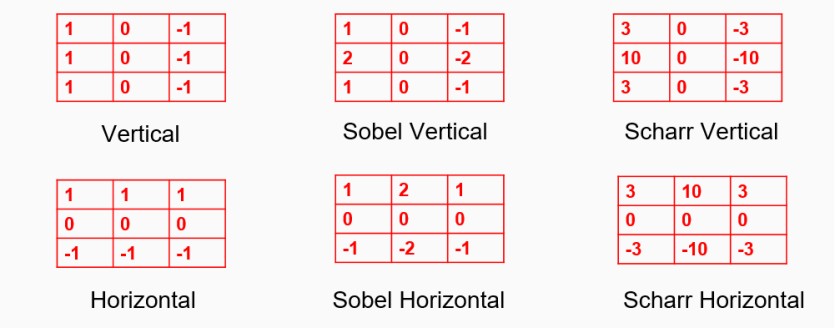


#### Second derivative filters: Laplacian

The Laplacian is the sum of the second partial derivatives. Opencv has the **cv2.laplacian()** function that implements the derivatives using the chain rule and Sobel filters.

    dst= cv2.Laplacian(src, ddepth,[ksize[, scale[, delta[, borderType]]]])

    If ksize == 1 (default), then following kernel is used for filtering:
    K=[[0, 1, 0]
       [1,-4, 1]
       [0, 1, 1]]

Below code shows all operators in a single diagram. All kernels are 3x3. Depth of output image is passed to get the result in np.uint8 type.

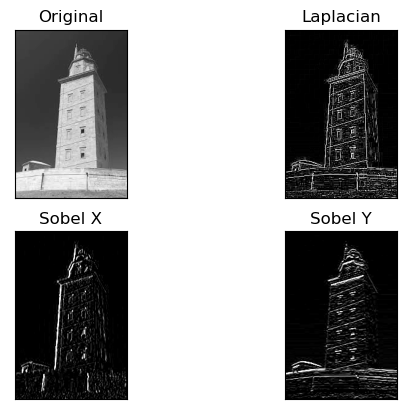

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(edge_images_path+'hercules_tower.jpg',0)
laplacian = cv2.Laplacian(img, cv2.CV_8U,ksize=3)
sobelx = cv2.Sobel(img, cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(img, cv2.CV_8U,0,1,ksize=3)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

**IMPORTANT!**

Output datatype can be cv2.CV_8U or np.uint8, but there is a slight problem with that. Black-to-White transition is taken as Positive slope (it has a positive value) while White-to-Black transition is taken as a Negative slope (It has negative value). So when you convert data to np.uint8, all negative slopes are made zero. In simple words, you miss that edge.
If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_64F, take its absolute value and then convert back to cv2.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.




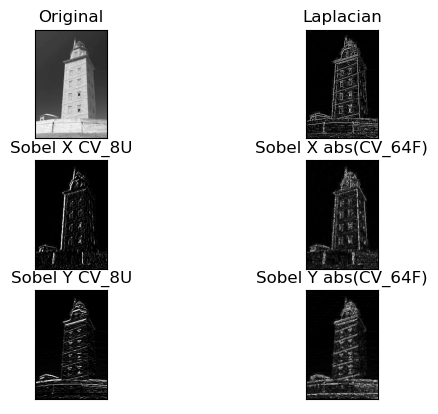

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread(edge_images_path+'hercules_tower.jpg',0)
laplacian = cv2.Laplacian(img, cv2.CV_8U,ksize=3)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
sobely8u = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U to visualze ite
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
sobely64f = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
abs_sobelx64f = np.absolute(sobelx64f)
sobelx64f_to_8u = np.uint8(abs_sobelx64f)
abs_sobely64f = np.absolute(sobely64f)
sobely64f_to_8u = np.uint8(abs_sobely64f)

plt.subplot(3,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,3),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel X CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,4),plt.imshow(sobelx64f_to_8u,cmap = 'gray')
plt.title('Sobel X abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.subplot(3,2,5),plt.imshow(sobely8u,cmap = 'gray')
plt.title('Sobel Y CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(3,2,6),plt.imshow(sobely64f_to_8u,cmap = 'gray')
plt.title('Sobel Y abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

### Exercise Canny edge detector

https://docs.opencv.org/4.3.0/da/d22/tutorial_py_canny.html
https://docs.opencv.org/3.4.2/da/d22/tutorial_py_canny.html

Canny algorithm was designed to meet the criteria of  good detection,  good location and single response. It uses multiple stages, as shown  below. OpenCV implements it as the function  cv2.Canny().

    edges = cv2.Canny(image, threshold1, threshold2[,edges [,apertureSize[, L2gradient]]])
    
- First argument is the input image. 
- Second and third arguments are the thresholds. 
  The former (lowest) is used for edge linking. 
  While threshold2 (highest) is used to find initial segments of strong edges. 
- Argument apertureSize is the size of Sobel kernel used for computing image gradients. By default it is 3. 
- Last argument is L2gradient which specifies the equation for measuring gradient magnitude. If it is True, L2 norm is used, which is usually more accurate. By default, it is False and L1 norm is used

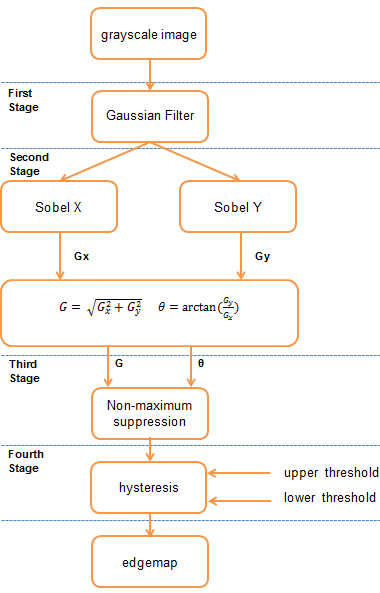

You can find a detailed implementation of the Canny detector here: https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123

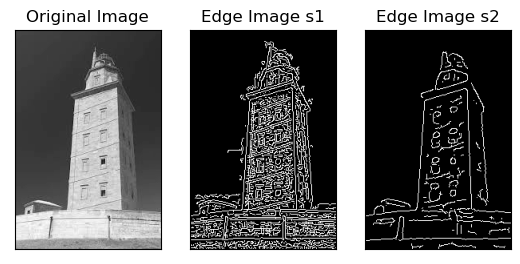

In [57]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image = cv2.imread(edge_images_path+'hercules_tower.jpg',0)

img=cv2.GaussianBlur(image,(3,3),0) #some previous smoothing is usually convenient
edges = cv2.Canny(img,5,15,apertureSize=3,L2gradient=True)

plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image s1'), plt.xticks([]), plt.yticks([])


img=cv2.GaussianBlur(image,(15,15),0) #some previous smoothing is usually convenient
edges = cv2.Canny(img,5,15,apertureSize=3,L2gradient=True)

plt.subplot(133),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image s2'), plt.xticks([]), plt.yticks([])
plt.show()

#### Exercises

1. Select the best values for threshold1, threshold2, and gaussian sigma, for each of the following images: chuvia.jpg, xardin.jpg, paseo.jpg.

2. Simple methods as: (1) computing the median gray-level values and determine high and low thresholds as simmetric values around the median; (2)thresholds based on the maximum of the gradient; (3) ....; work well depending on the image context.


113.57806259314457


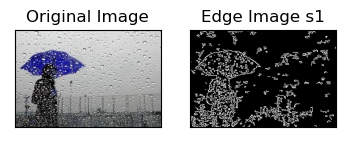

In [66]:
#SOLUTION HERE

import cv2
import numpy as np

# read the image
image = cv2.imread(edge_images_path+"chuvia.jpg")


# Apply a median blur to the image
img = cv2.medianBlur(img, 5)

# Compute the median gray-level value of the image
median_value = cv2.mean(img)[0]

# Print the median gray-level value
print(median_value)

# set the gaussian sigma value
gaussian_sigma = 5
high_threshold = median_value + (median_value * gaussian_sigma)
low_threshold = median_value - (median_value * gaussian_sigma)


# apply the Canny edge detection algorithm
edges = cv2.Canny(image, low_threshold, high_threshold, gaussian_sigma)

# show the resulting image
plt.subplot(131),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image s1'), plt.xticks([]), plt.yticks([])

plt.show()


#### Exercise

Compare the following two template matching alternatives  regarding their  performance : (i) case of using image intensity as features for matching, and  (ii) case of using their edge maps as features. Use faces.jpg and two different templates right_eye.jpg and right_eye_i.jpg. You  will have to compute their edge maps to perform the matching in case (ii).

In [ ]:
#SOLUTION HERE

### Exercise Hough Tranform

https://docs.opencv.org/3.4.2/d6/d10/tutorial_py_houghlines.html

A line in image space can be expressed with two parameters:
- In the Cartesian coordinate system:  (m,b).
- In the Polar coordinate system: (r,θ)
For Hough Transforms, we will express lines in the Polar system. Hence, a line equation can be written as   r=xcosθ+ysinθ. In general for each point (x0,y0), we can define the family of lines that goes through that point as  r=x0cosθ+y0sinθ. Meaning that each pair (r,θ) represents each line that passes by (x0,y0).

Hough Transform is encapsulated in the OpenCV function cv2.HoughLines().

    lines=cv.HoughLines(edges, rho, theta, threshold [, srn[, stn[, min_theta[,max_theta]]]]])
    
- It simply returns an array of (r,θ) values; r is measured in pixels and θ  is measured in radians. 
- First parameter, edges image should be a binary image, so apply threshold or use canny edge detection before applying Hough transform. 
- Second and third parameters are rho and theta accuracies, respectively. 
- Fourth argument is the threshold, which means minimum votes it should get for it to be considered as a line. Remember, number of votes depend upon number of points detected on the line.

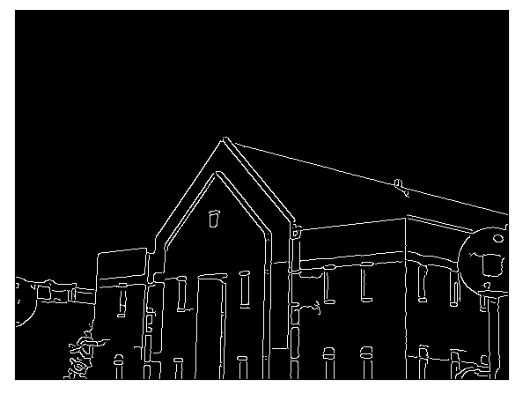

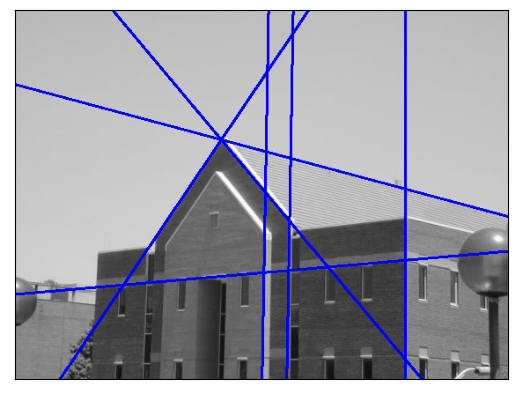

In [38]:
import cv2
import numpy as np
import math
from matplotlib import pyplot as plt

img = cv2.imread(edge_images_path+'building.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray=img
imgP=img.copy()

gray = cv2.GaussianBlur(img,(7,7),0)
edges = cv2.Canny(gray,1,50,apertureSize=3,L2gradient=True)
lines = cv2.HoughLines(edges,1,np.pi/180,120)

#Draw all the lines
if lines is not None:
  for i in range(0,len(lines)):
      rho = lines[i][0][0]
      theta = lines[i][0][1]
      a = np.cos(theta)
      b = np.sin(theta)
      x0 = a * rho
      y0 = b * rho
      pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
      pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
      cv2.line(imgP, pt1, pt2, (0,0,255), 2)

plt.imshow(edges,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()
plt.imshow(imgP,cmap='gray'), plt.xticks([]), plt.yticks([])
plt.show()

A  more efficient implementation of the Hough Line Transform is the function **HoughLinesP()**.
It returns the extremes of  detected lines (x0,y0,x1,y1). This function has two extra parameters:

- MinLineLength: Minimum line length. Line segments shorter than it are rejected.
- MaxLineGap: Maximum allowed gap between points on the same line to link them.


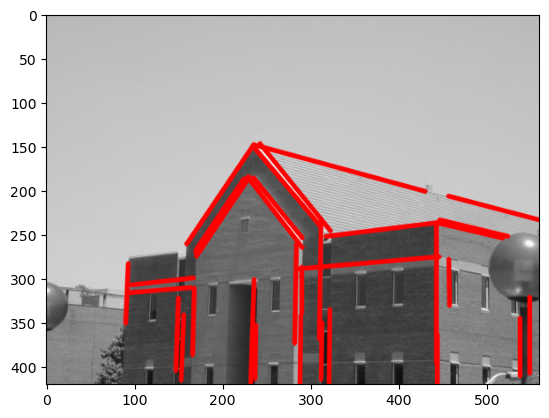

In [39]:
linesP = cv2.HoughLinesP(edges,1,np.pi/180,50,
                 minLineLength=50,maxLineGap=10)

imgP=img.copy()

if linesP is not None:
   for i in range(0, len(linesP)):
      l = linesP[i][0]
      cv2.line(imgP, (l[0], l[1]), (l[2], l[3]), (255,0,0), 3, cv2.LINE_AA)


plt.imshow(imgP)
plt.show()

### Exercise

Consider the image naval.jpg. Try to detect lines with the best trade-off between the numbers of True Positive lines and False Negative ones. Consider different levels of smoothing when applying Canny detector.

In [ ]:
#SOLUTION HERE

### Exercise: Hough Transform applied to circles

https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html

A circle is represented mathematically by its center *(xcenter,ycenter)* and its radius *r*. As it has 3 parameters, we need a 3D accumulator for hough transform. OpenCV offers the function **cv2.HoughCircles()**.

        circles= cv2.HoughCircles(image, method, dp, minDist[, param1[, param2[, minRadius[, maxRadius]]]])
        
- **image**	8-bit, single-channel, grayscale input image.
- **circles**	Output vector of found circles. Each vector is encoded as 3 or 4 element floating-point vector (x,y,radius) or (x,y,radius,votes) .
- **dp** Inverse ratio of the accumulator resolution to the image resolution: if dp=1 the accumulator has the same resolution as the input image; if dp=2 the accumulator has half as big width and height. 
- **minDist**	Minimum distance between the centers of the detected circles.
- **param1** Higher threshold of the two passed to the Canny edge detector (the lower one is twice smaller). 
- **param2** Accumulator threshold for the circle centers at the detection stage. 
- **minRadius**	Minimum circle radius.
- **maxRadius**	Maximum circle radius. 

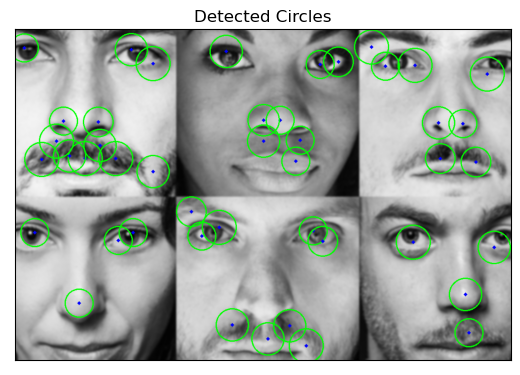

In [40]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

img = cv2.imread(edge_images_path+'faces.jpg',0)
img = cv2.GaussianBlur(img,(9,9),2)

cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)


circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,dp=2,minDist=30, param1=40,param2=40,minRadius=30,maxRadius=40)
circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)
plt.title('Detected Circles'), plt.xticks([]), plt.yticks([])
plt.show()

### Exercise

Implement a program for the estimation of the number of fishes in fishes.jpg image, according to the number of detected eyes. Choose the most convenient parameters.

In [ ]:
#SOLUTION HERE